<a href="https://colab.research.google.com/github/thapaliya123/Covid-19-Classification/blob/master/covid_19_dataset_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

#datsets location
DATADIR = "/content/gdrive/My Drive/xray_image_classifiaction/dataset"

#define classes
CATEGORIES = ["covid", "normal"]

print("datasets path configure success")

datasets path configure success


In [10]:
IMG_SIZE = 224
datasets = []
def  create_datasets():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)

    for img in os.listdir(path):
      try:
        image_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        resized_image_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
        datasets.append([resized_image_array, class_num])

      except Exception as e:
        pass

create_datasets()
print("datasets created")


datasets created


In [14]:
import random

random.shuffle(datasets)
features_datasets = []
label_datasets = []

for feature, label in datasets:
  features_datasets.append(feature)
  label_datasets.append(label)

In [16]:
features_datasets = np.array(features_datasets).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # 1 is for 1 channel of color
features_datasets.shape

(50, 224, 224, 1)

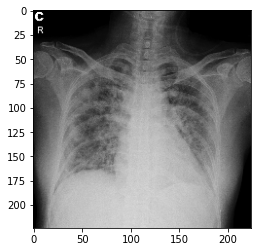

In [22]:
#visualize features image created
plt.imshow(features_datasets[0].reshape(224, 224), cmap="gray")

In [24]:
#saving_created_data_into_the_pickle_file
import pickle

features_pickle_file  = "/content/gdrive/My Drive/xray_image_classifiaction/features_datasets.pickle"
labels_pickle_file = "/content/gdrive/My Drive/xray_image_classifiaction/label_datasets.pickle"

pickle_out = open(features_pickle_file, "wb")
pickle.dump(features_datasets, pickle_out)
pickle_out.close()


pickle_out = open(labels_pickle_file, "wb")
pickle.dump(label_datasets, pickle_out)
pickle_out.close()

pickle_in = open(labels_pickle_file, "rb")
feature = pickle.load(pickle_in)
feature = np.array(feature).reshape(1, 50)
print(feature)

[[0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1
  0 0 0 0 0 1 1 1 0 1 0 0 1 1]]
